# 0- Importing Libraries

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import abs, col, corr
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import countDistinct
from pyspark.sql.functions import count

# 1- Importing Dataset

In [0]:
Data=spark.read\
.format("com.databricks.spark.csv")\
.option("multiline",True)\
.option("header",True)\
.option("escape", "\"")\
.option("inferschema",True)\
.csv("/FileStore/tables/joined_data.csv")
display(Data)

id,kw1,kw2,director,Drama,Fantasy,Family,Foreign,Action,Unknown,Documentary,Animation,Romance,Thriller,Western,Science Fiction,TV Movie,Comedy,Adventure,War,Music,Horror,Crime,History,Mystery,actor_name1,actor_name2,actor_name3,budget,original_language,release_date,revenue,runtime,video,cntry_name,vote_average,vote_count
11578,mountain,pastor,Julien Duvivier,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Fernandel,Gino Cervi,Leda Gloria,0,fr,1953-06-05,0,115,false,Italy,7.2,34.0
18406,sadism,sexploitation,Paul Nicholas,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,Linda Blair,John Vernon,Sybil Danning,0,en,1983-05-27,0,99,false,United States of America,4.6,14.0
21946,investigation,serial killer,Franck Mancuso,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Jean Dujardin,Laurent Lucas,Agnès Blanchot,0,fr,2007-03-07,0,85,false,France,7.0,69.0
30586,rap music,hip-hop,Nick Broomfield,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Tupac Amaru Shakur,Nick Broomfield,The Notorious B.I.G.,0,en,2002-01-11,0,107,false,United Kingdom,6.3,27.0
55648,silent film,masochist,Ernst Lubitsch,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Pola Negri,Victor Janson,Paul Heidemann,0,de,1921-04-14,0,79,false,Germany,6.3,3.0
130624,german,remake,Douglas Sirk,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hansi Knoteck,Ellen Frank,Friedrich Kayssler,0,de,1935-09-10,0,82,false,Germany,8.0,1.0
4267,wife husband relationship,1970s,Bertrand Blier,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Gérard Depardieu,Patrick Dewaere,Carole Laure,0,fr,1978-01-11,0,108,false,France,6.9,18.0
4992,sea,repayment,Samuel Fuller,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Burt Reynolds,Barry Sullivan,Silvia Pinal,0,en,1969-10-08,0,92,false,Mexico,2.0,1.0
20021,drama,independent film,James Marsh,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Gael García Bernal,William Hurt,Pell James,0,en,2005-01-01,0,105,false,United States of America,6.5,20.0
36887,female nudity,adult,Ernst Hofbauer,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Friedrich von Thun,Rena Bergen,Kurt Bülau,0,de,1971-08-26,0,91,false,Germany,6.8,5.0


# 2- Hot encoding the columns & unix_timestamp

In [0]:
Data = Data.withColumn("release_date_unix", unix_timestamp("release_date"))

In [0]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

# Specify categorical columns to be one-hot encoded
cat_cols = ['kw1', 'kw2', 'director', 'cntry_name', 'actor_name1', 'actor_name2', 'actor_name3', 'original_language']

# Create a list of StringIndexer stages for categorical columns
string_indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in cat_cols]

# Create a list of OneHotEncoder stages for categorical columns
one_hot_encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_encoded") for col in cat_cols]

# Define the pipeline stages
stages = string_indexers + one_hot_encoders

# Create a Pipeline object
pipeline = Pipeline(stages=stages)

# Fit and transform the pipeline on your DataFrame
transformed_data = pipeline.fit(Data).transform(Data)

In [0]:
transformed_data.show()

+------+--------------------+-----------------+---------------+-----+-------+------+-------+------+-------+-----------+---------+-------+--------+-------+---------------+--------+------+---------+---+-----+------+-----+-------+-------+------------------+--------------------+--------------------+------+-----------------+------------+-------+-------+-----+--------------------+------------+----------+-----------------+---------+---------+--------------+----------------+-----------------+-----------------+-----------------+-----------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------------+
|    id|                 kw1|              kw2|       director|Drama|Fantasy|Family|Foreign|Action|Unknown|Documentary|Animation|Romance|Thriller|Western|Science Fiction|TV Movie|Comedy|Adventure|War|Music|Horror|Crime|History|Mystery|       actor_name1|         actor_name2|         a

In [0]:
num_unique_kw1 = transformed_data.agg(countDistinct('kw1_index')).collect()[0][0]
print(num_unique_kw1)

2570


In [0]:
total_count = transformed_data.select("kw1_index").count()
print("Total count of kw1_index:", total_count)

Total count of kw1_index: 14044


# 3- Checking Correlation

In [0]:
from pyspark.sql.functions import corr

budget_corr = transformed_data.drop('kw1', 'kw2', 'director', 'cntry_name', 'actor_name1', 'actor_name2', 'actor_name3','original_language', 'video','release_date','kw1_encoded', 'kw2_encoded', 'director_encoded', 'cntry_name_encoded','actor_name1_encoded', 'actor_name2_encoded', 'actor_name3_encoded', 'original_language_encoded').select([corr('vote_average', col).alias(col) for col in transformed_data.columns if col not in ('kw1', 'kw2', 'director', 'cntry_name', 'actor_name1', 'actor_name2', 'actor_name3','original_language','video','release_date','kw1_encoded', 'kw2_encoded', 'director_encoded', 'cntry_name_encoded','actor_name1_encoded', 'actor_name2_encoded', 'actor_name3_encoded', 'original_language_encoded')])
budget_corr.show()

+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------+-------------------+------------+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+-----------------------+
|                  id|             Drama|             Fantasy|              Family|             Foreign|              Action|             Unknown|       Documentary|          Animation|             Romance|            Thriller|             Western|     Science Fiction|   

In [0]:
from pyspark.sql.functions import abs as pyspark_abs

budget_corr_df = budget_corr.toPandas().T
budget_corr_df.columns = ['corr']

# Convert to PySpark DataFrame
budget_corr_spark = spark.createDataFrame(budget_corr_df.reset_index().rename(columns={'index': 'col'}))

# Add absolute value column and sort descending
budget_corr_spark = (
    budget_corr_spark
    .withColumn('corr_abs', pyspark_abs(budget_corr_spark['corr']))
    .orderBy('corr_abs', ascending=False)
)

# Convert back to pandas DataFrame
budget_corr_df = budget_corr_spark.toPandas().set_index('col')
budget_corr_df

,corr,corr_abs
col,,
vote_average,1.000000,1.000000
id,-0.205556,0.205556
vote_count,0.176343,0.176343
Drama,0.150065,0.150065
runtime,0.126636,0.126636
original_language_index,0.124967,0.124967
Science Fiction,-0.119954,0.119954
Documentary,0.113859,0.113859
Horror,-0.106239,0.106239


# 4- K-means to check clustering (Elbow Method)

In [0]:
# feature columns to use for clustering
feature_cols = ['Drama', 'Fantasy', 'Family', 'Foreign', 'Action', 'Unknown', 'Documentary', 
                'Animation', 'Romance', 'Thriller', 'Western', 'Science Fiction', 'TV Movie', 
                'Comedy', 'Adventure', 'War', 'Music', 'Horror', 'Crime', 'History', 'Mystery', 
                'budget', 'revenue', 'runtime','vote_average']

In [0]:
# Assemble the feature columns into a vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
data_with_features = assembler.transform(transformed_data)

In [0]:
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(k=k, seed=1)
  model = kmeans.fit(data_with_features)
  predictions = model.transform(data_with_features)
  evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', 
                                   metricName='silhouette', distanceMeasure='squaredEuclidean')
  silhouette_score = evaluator.evaluate(predictions)
  silhouette_scores.append(silhouette_score)
  print(f'K = {k}: Silhouette score = {silhouette_score}')

K = 2: Silhouette score = 0.9432597177038861
K = 3: Silhouette score = 0.931029323650916
K = 4: Silhouette score = 0.8446150007621392
K = 5: Silhouette score = 0.5943485859708082
K = 6: Silhouette score = 0.6046907249956176
K = 7: Silhouette score = 0.6601177044830332
K = 8: Silhouette score = 0.589282085517321
K = 9: Silhouette score = 0.5578010631239011
K = 10: Silhouette score = 0.5577697479442683


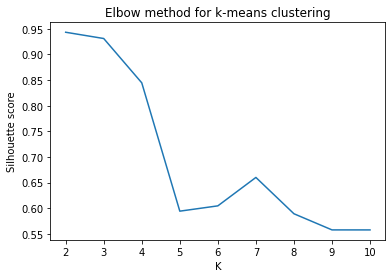

In [0]:
# Plot the silhouette scores to find the optimal k using the elbow method
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.title('Elbow method for k-means clustering')
plt.show()

In [0]:
best_k= 2

In [0]:
# Cluster the data using KMeans with k=3
kmeans = KMeans(k=best_k, seed=1)
model = kmeans.fit(data_with_features)
clustered_data = model.transform(data_with_features)

In [0]:
clustered_data_with_cluster = clustered_data.withColumn('cluster', clustered_data['prediction'])

In [0]:
clustered_data_with_cluster.show()

+------+--------------------+-----------------+---------------+-----+-------+------+-------+------+-------+-----------+---------+-------+--------+-------+---------------+--------+------+---------+---+-----+------+-----+-------+-------+------------------+--------------------+--------------------+------+-----------------+------------+-------+-------+-----+--------------------+------------+----------+-----------------+---------+---------+--------------+----------------+-----------------+-----------------+-----------------+-----------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------------+--------------------+----------+-------+
|    id|                 kw1|              kw2|       director|Drama|Fantasy|Family|Foreign|Action|Unknown|Documentary|Animation|Romance|Thriller|Western|Science Fiction|TV Movie|Comedy|Adventure|War|Music|Horror|Crime|History|Mystery|       act

In [0]:
cluster_counts = clustered_data_with_cluster.groupBy('cluster').agg(count('*').alias('count'))
cluster_counts.show()

+-------+-----+
|cluster|count|
+-------+-----+
|      1|13616|
|      0|  428|
+-------+-----+



Cluster 0 has only 3% as many datapoints as the cluster 1, then stratified sampling may not be the best approach since it will allocate only 3% of the data points to the smaller cluster. As a results, it is more appropriate to use simple random sampling.

# 5- Randm Sampling (Test & Train)

In [0]:
# Create a list of columns that contain string values
string_columns = ['kw1', 'kw2', 'director', 'actor_name1', 'actor_name2', 'actor_name3', 'original_language', 'cntry_name']

# Drop the columns that contain string values
transformed_data = transformed_data.drop(*string_columns)

In [0]:
# Define the feature columns to use for regression
feature_cols = ['vote_count', 'Drama', 'runtime', 'original_language_index', 'Science Fiction', 'Documentary', 'Horror', 'Animation']

In [0]:
# Drop the assembled_features column if it already exists
if 'assembled_features' in transformed_data.columns:
    transformed_data = transformed_data.drop('assembled_features')

In [0]:
from pyspark.ml.feature import VectorAssembler

# Create a vector assembler to combine features
assembler = VectorAssembler(inputCols=feature_cols, outputCol='assembled_features')

# Transform the data to include the features vector
transformed_data2 = assembler.transform(transformed_data)

In [0]:
transformed_data2= transformed_data2.select(['vote_count','Drama', 'runtime', 'original_language_index', 'Science Fiction', 'Documentary', 'Horror', 'Animation','vote_average','assembled_features'])

In [0]:
(train_data, test_data) = transformed_data2.randomSplit([0.8, 0.2], seed=1234)

In [0]:
train_data.cache()
test_data.cache()

Out[30]: DataFrame[vote_count: double, Drama: int, runtime: int, original_language_index: double, Science Fiction: int, Documentary: int, Horror: int, Animation: int, vote_average: double, assembled_features: vector]

In [0]:
# Count the number of data points in each data set
train_count = train_data.count()
test_count = test_data.count()

# Print the number of data points in each data set
print("Number of data points in train data set: ", train_count)
print("Number of data points in test data set: ", test_count)

Number of data points in train data set:  11279
Number of data points in test data set:  2765


# 6-Regression Models: Estimating average votes depending on different characteristics

In [0]:
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.sql import DataFrame

def printStats(df, predictionColName, labelColName):
  # type: (DataFrame, str, str) -> None
  justPredictionAndLabelDF = df.select(predictionColName, labelColName)
  metrics = RegressionMetrics(justPredictionAndLabelDF.rdd)

  rmse = metrics.rootMeanSquaredError
  mae = metrics.meanAbsoluteError
  r2 = metrics.r2
  print(  "Root Mean Squared Error: {}".format(rmse))
  print ("Mean Absolute Error: {}".format(mae))
  print ("R2: {}".format(r2))

### 6.1 Linear Regression

Method 1

In [0]:
from pyspark.ml.regression import LinearRegression

# Create a linear regression estimator
lr = LinearRegression(featuresCol="assembled_features", labelCol="vote_average")

In [0]:
# Train the model using the training data
lr_model = lr.fit(train_data)

In [0]:
# Make predictions on the test data
predictions = lr_model.transform(test_data)

In [0]:
# Evaluate the model using RMSE and R2
evaluator_rmse = RegressionEvaluator(labelCol="vote_average", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="vote_average", predictionCol="prediction", metricName="r2")
rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
print("R² on test data = %g" % r2)

Root Mean Squared Error (RMSE) on test data = 1.52205
R² on test data = 0.103821


Method 2

In [0]:
# We will use the new spark.ml pipeline API. If you have worked with scikit-learn this will be very familiar.
lrPipeline = Pipeline()

# Now we'll tell the pipeline to first create the feature vector, and then do the linear regression
lrPipeline.setStages([vecAssembler, lr])

# Pipelines are themselves Estimators -- so to use them we call fit:
lrPipelineModel = lrPipeline.fit(train_data)

In [0]:
predictionsAndLabelsDF = lrPipelineModel.transform(test_data)
display(predictionsAndLabelsDF.select('vote_average', 'prediction').repartition(100)) # Repartition to shuffle the data

vote_average,prediction
7.0,6.330065366156962
3.5,5.88540828106042
5.4,5.893038007249875
3.6,5.254918024531695
5.9,5.852622168130674
6.7,5.878598103103144
5.5,5.583541093380968
6.8,6.06574332906374
4.4,4.986657082241872
6.9,6.2155998355746265


In [0]:
# The intercept is as follows:
intercept = lrPipelineModel.stages[1].intercept
print (intercept)

4.930092869326636


In [0]:
# The coefficents (i.e. weights) are as follows:
weights = lrPipelineModel.stages[1].coefficients
print (dict(zip(vecAssembler.getInputCols(), weights)))

{'vote_count': 0.0036799535254220155, 'Drama': 0.43546877163511977, 'runtime': 0.00481330138224369, 'original_language_index': 0.0311565948234518, 'Science Fiction': -0.46439197618690986, 'Documentary': 1.1074944603702825, 'Horror': -0.14431806654922857, 'Animation': 0.7548295231724387}


In [0]:
printStats(predictionsAndLabelsDF, "prediction", "vote_average")

Root Mean Squared Error: 1.522048397621042
Mean Absolute Error: 1.0237551945726673
R2: 0.10382090778331221


### 6.2 Generalized Linear Regression

In [0]:
from pyspark.ml.regression import GeneralizedLinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
# Create a Generalized Linear Regression model
glr = GeneralizedLinearRegression(featuresCol='assembled_features', labelCol='vote_average', family='gaussian', link='identity', maxIter=100, regParam=0.1)

In [0]:
model = glr.fit(train_data)

In [0]:
predictions = model.transform(test_data)

In [0]:
# Evaluate the performance of the model using the root mean squared error, mean squared error, and R squared
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)

print('Root Mean Squared Error:', rmse)
print('Mean Squared Error:', mse)
print('R squared:', r2)

Root Mean Squared Error: 1.5229020724464688
Mean Squared Error: 2.3192307222617496
R squared: 0.10281534176093288


### 6.3 Random Forest

In [0]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a random forest regression model
rf = RandomForestRegressor(featuresCol='assembled_features', labelCol='vote_average', numTrees=50, maxDepth=30, maxBins=64 )

In [0]:
# Fit the model to the training data
model = rf.fit(train_data)

In [0]:
# Make predictions on the testing data
predictions = model.transform(test_data)

In [0]:
# Evaluate the performance of the model using the root mean squared error, mean squared error, and R squared
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)

print('Root Mean Squared Error:', rmse)
print('Mean Squared Error:', mse)
print('R squared:', r2)

Root Mean Squared Error: 1.0287975812939114
Mean Squared Error: 1.0584244632762023
R squared: 0.590552944456401


### 6.4 Gradient-Boosted Trees

In [0]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a Gradient-Boosted Trees regression model
gbt = GBTRegressor(featuresCol='assembled_features', labelCol='vote_average', maxDepth=5, maxBins=63, maxIter=50)

In [0]:
model = gbt.fit(train_data)

In [0]:
# Make predictions on the test data
predictions = model.transform(test_data)

In [0]:
# Evaluate the performance of the model using the root mean squared error, mean squared error, and R squared
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)

In [0]:
print('Root Mean Squared Error:', rmse)
print('Mean Squared Error:', mse)
print('R squared:', r2)

Root Mean Squared Error: 1.0519898953772076
Mean Squared Error: 1.106682739975748
R squared: 0.5718844329226868


### 6.4 Decision Trees

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
dt = DecisionTreeRegressor(featuresCol='assembled_features', labelCol='vote_average', maxDepth=10, maxBins=63 )

In [0]:
model = dt.fit(train_data)

In [0]:
predictions = model.transform(test_data)

In [0]:
# Evaluate the performance of the model using the root mean squared error, mean squared error, and R squared
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol='vote_average', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)

print('Root Mean Squared Error:', rmse)
print('Mean Squared Error:', mse)
print('R squared:', r2)

Root Mean Squared Error: 1.1009694857146308
Mean Squared Error: 1.2121338084747386
R squared: 0.5310911302365499
